In [129]:
from random import choice
import os

PATH = '/home/gemelli/projects/doc2graph/DATA/PAU/data'

Pick random image and annotations

In [130]:
image = choice([f for f in os.listdir(PATH) if f.endswith('tif')])
img_name = image.split('.')[0]
file_gt = img_name + '_gt.xml'
file_ocr = img_name + '_ocr.xml'

image, file_gt, file_ocr

('2084022300.tif', '2084022300_gt.xml', '2084022300_ocr.xml')

In [131]:
import xml.etree.ElementTree as ET
root = ET.parse(os.path.join(PATH, file_gt)).getroot()
regions = []
for parent in root:
    if parent.tag.split("}")[1] == 'Page':
        for child in parent:
            region_label = child[0].attrib['value'] 
            region_bbox = [int(child[1].attrib['points'].split(" ")[0].split(",")[0].split(".")[0]),
                           int(child[1].attrib['points'].split(" ")[1].split(",")[1].split(".")[0]),
                           int(child[1].attrib['points'].split(" ")[2].split(",")[0].split(".")[0]),
                           int(child[1].attrib['points'].split(" ")[3].split(",")[1].split(".")[0])]
            regions.append([region_label, region_bbox])
            print([region_label, region_bbox])

['supplier', [21, 75, 249, 136]]
['receiver', [145, 172, 590, 200]]
['invoice_info', [350, 120, 585, 168]]
['positions', [142, 209, 594, 402]]
['total', [145, 408, 596, 439]]
['other', [28, 477, 716, 972]]


In [137]:
root = ET.parse(os.path.join(PATH, file_ocr)).getroot()
tokens = []
for parent in root:
    if parent.tag.split("}")[1] == 'Page':
        for child in parent:
            if child.tag.split("}")[1] == 'TextRegion':
                for elem in child:
                    if elem.tag.split("}")[1] == 'TextLine':
                        for word in elem:
                            if word.tag.split("}")[1] == 'Word':
                                word_bbox = [int(word[0].attrib['points'].split(" ")[0].split(",")[0].split(".")[0]),
                                             int(word[0].attrib['points'].split(" ")[1].split(",")[1].split(".")[0]),
                                             int(word[0].attrib['points'].split(" ")[2].split(",")[0].split(".")[0]),
                                             int(word[0].attrib['points'].split(" ")[3].split(",")[1].split(".")[0])]
                                word_text = word[1][0].text
                                center = lambda rect: ((rect[2]+rect[0])/2, (rect[3]+rect[1])/2)
                                c = center(word_bbox)
                                for reg in regions:
                                    r = reg[1]
                                    if r[0] < c[0] < r[2] and r[1] < c[1] < r[3]:
                                        word_label = reg[0]
                                        break
                                tokens.append([word_label, word_text, word_bbox])
                                print([word_text, word_bbox])

['LEO', [76, 96, 103, 106]]
['BURNETT', [113, 95, 185, 105]]
['U.S.A.', [192, 95, 232, 105]]
['A', [76, 109, 81, 114]]
['MVHM*', [84, 109, 114, 114]]
['OI', [118, 109, 126, 114]]
['ixo', [130, 109, 142, 114]]
['munctt', [145, 108, 178, 114]]
['comrun.', [182, 108, 217, 114]]
['me.', [220, 108, 234, 113]]
['ADVERTISING', [119, 118, 189, 126]]
['NEWSPAPER', [365, 129, 417, 135]]
['ESTIMATE', [454, 128, 499, 135]]
['RECAP', [506, 128, 535, 135]]
['-', [548, 131, 552, 132]]
['PNOS', [559, 129, 581, 135]]
['PERIOD', [400, 148, 435, 155]]
['DATE', [500, 148, 523, 155]]
['07/12/96', [535, 147, 580, 156]]
['01/01/96', [353, 157, 400, 166]]
['TO', [406, 158, 418, 165]]
['12/31/96', [426, 157, 471, 166]]
['PAGE', [501, 158, 523, 165]]
['1', [577, 158, 580, 165]]
['CLIENT:', [149, 178, 187, 185]]
['P.M.', [201, 178, 222, 185]]
['INC.', [231, 178, 251, 185]]
['OFFICE:', [276, 178, 315, 185]]
['10', [325, 178, 335, 185]]
['DESC:', [400, 178, 428, 185]]
['703A', [436, 178, 459, 185]]
['MILITARY', [4

In [138]:
COLORS = {'invoice_info': (255, 0, 0), 'receiver':(0, 255, 0), 'other':(0, 0, 255), 'supplier': (255, 0, 255), 'positions':(255, 255, 0), 'total':(0, 255, 255)}
def get_color(text):
    return COLORS[text]

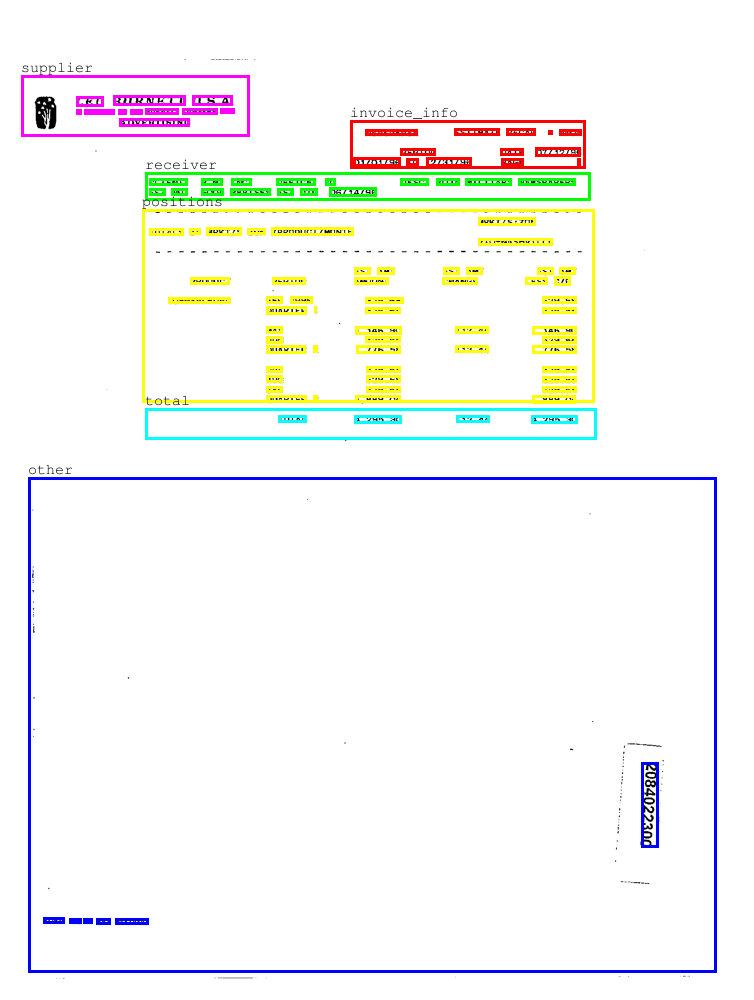

In [139]:
from turtle import color
from PIL import Image, ImageDraw, ImageFont

img = Image.open(os.path.join(PATH, image)).convert('RGB')
draw = ImageDraw.Draw(img)
for rect in tokens:
    draw.rectangle(rect[2], outline=get_color(rect[0]), width=3)
for rect in regions:
    draw.rectangle(rect[1], outline=get_color(rect[0]), width=3)
    draw.text((rect[1][0], rect[1][1]-15), rect[0], font=ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 15), fill='black')
img